In [3]:
import sys
# Add the ptdraft folder path to the sys.path list
sys.path.append('/hdd/Github/tensorflow_experiments/')
import os
from data_pipeline import get_tfrecords, imgs_input_fn
import tensorflow as tf
import matplotlib.pyplot as plt

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
train_records, _ = get_tfrecords('train', base_dir='/hdd/Github/tensorflow_experiments/')

num_rows = 5
num_cols = 4
next_example, next_label = imgs_input_fn(train_records, 'train', perform_shuffle=False, repeat_count=30, batch_size=num_rows*num_cols)
image_batch = tf.placeholder_with_default(next_example, shape=[None, 80, 80, 3])
label_batch = tf.placeholder_with_default(next_label, shape=[None, 2])
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
X, Y = sess.run([image_batch, label_batch])

Showing 20 training examples


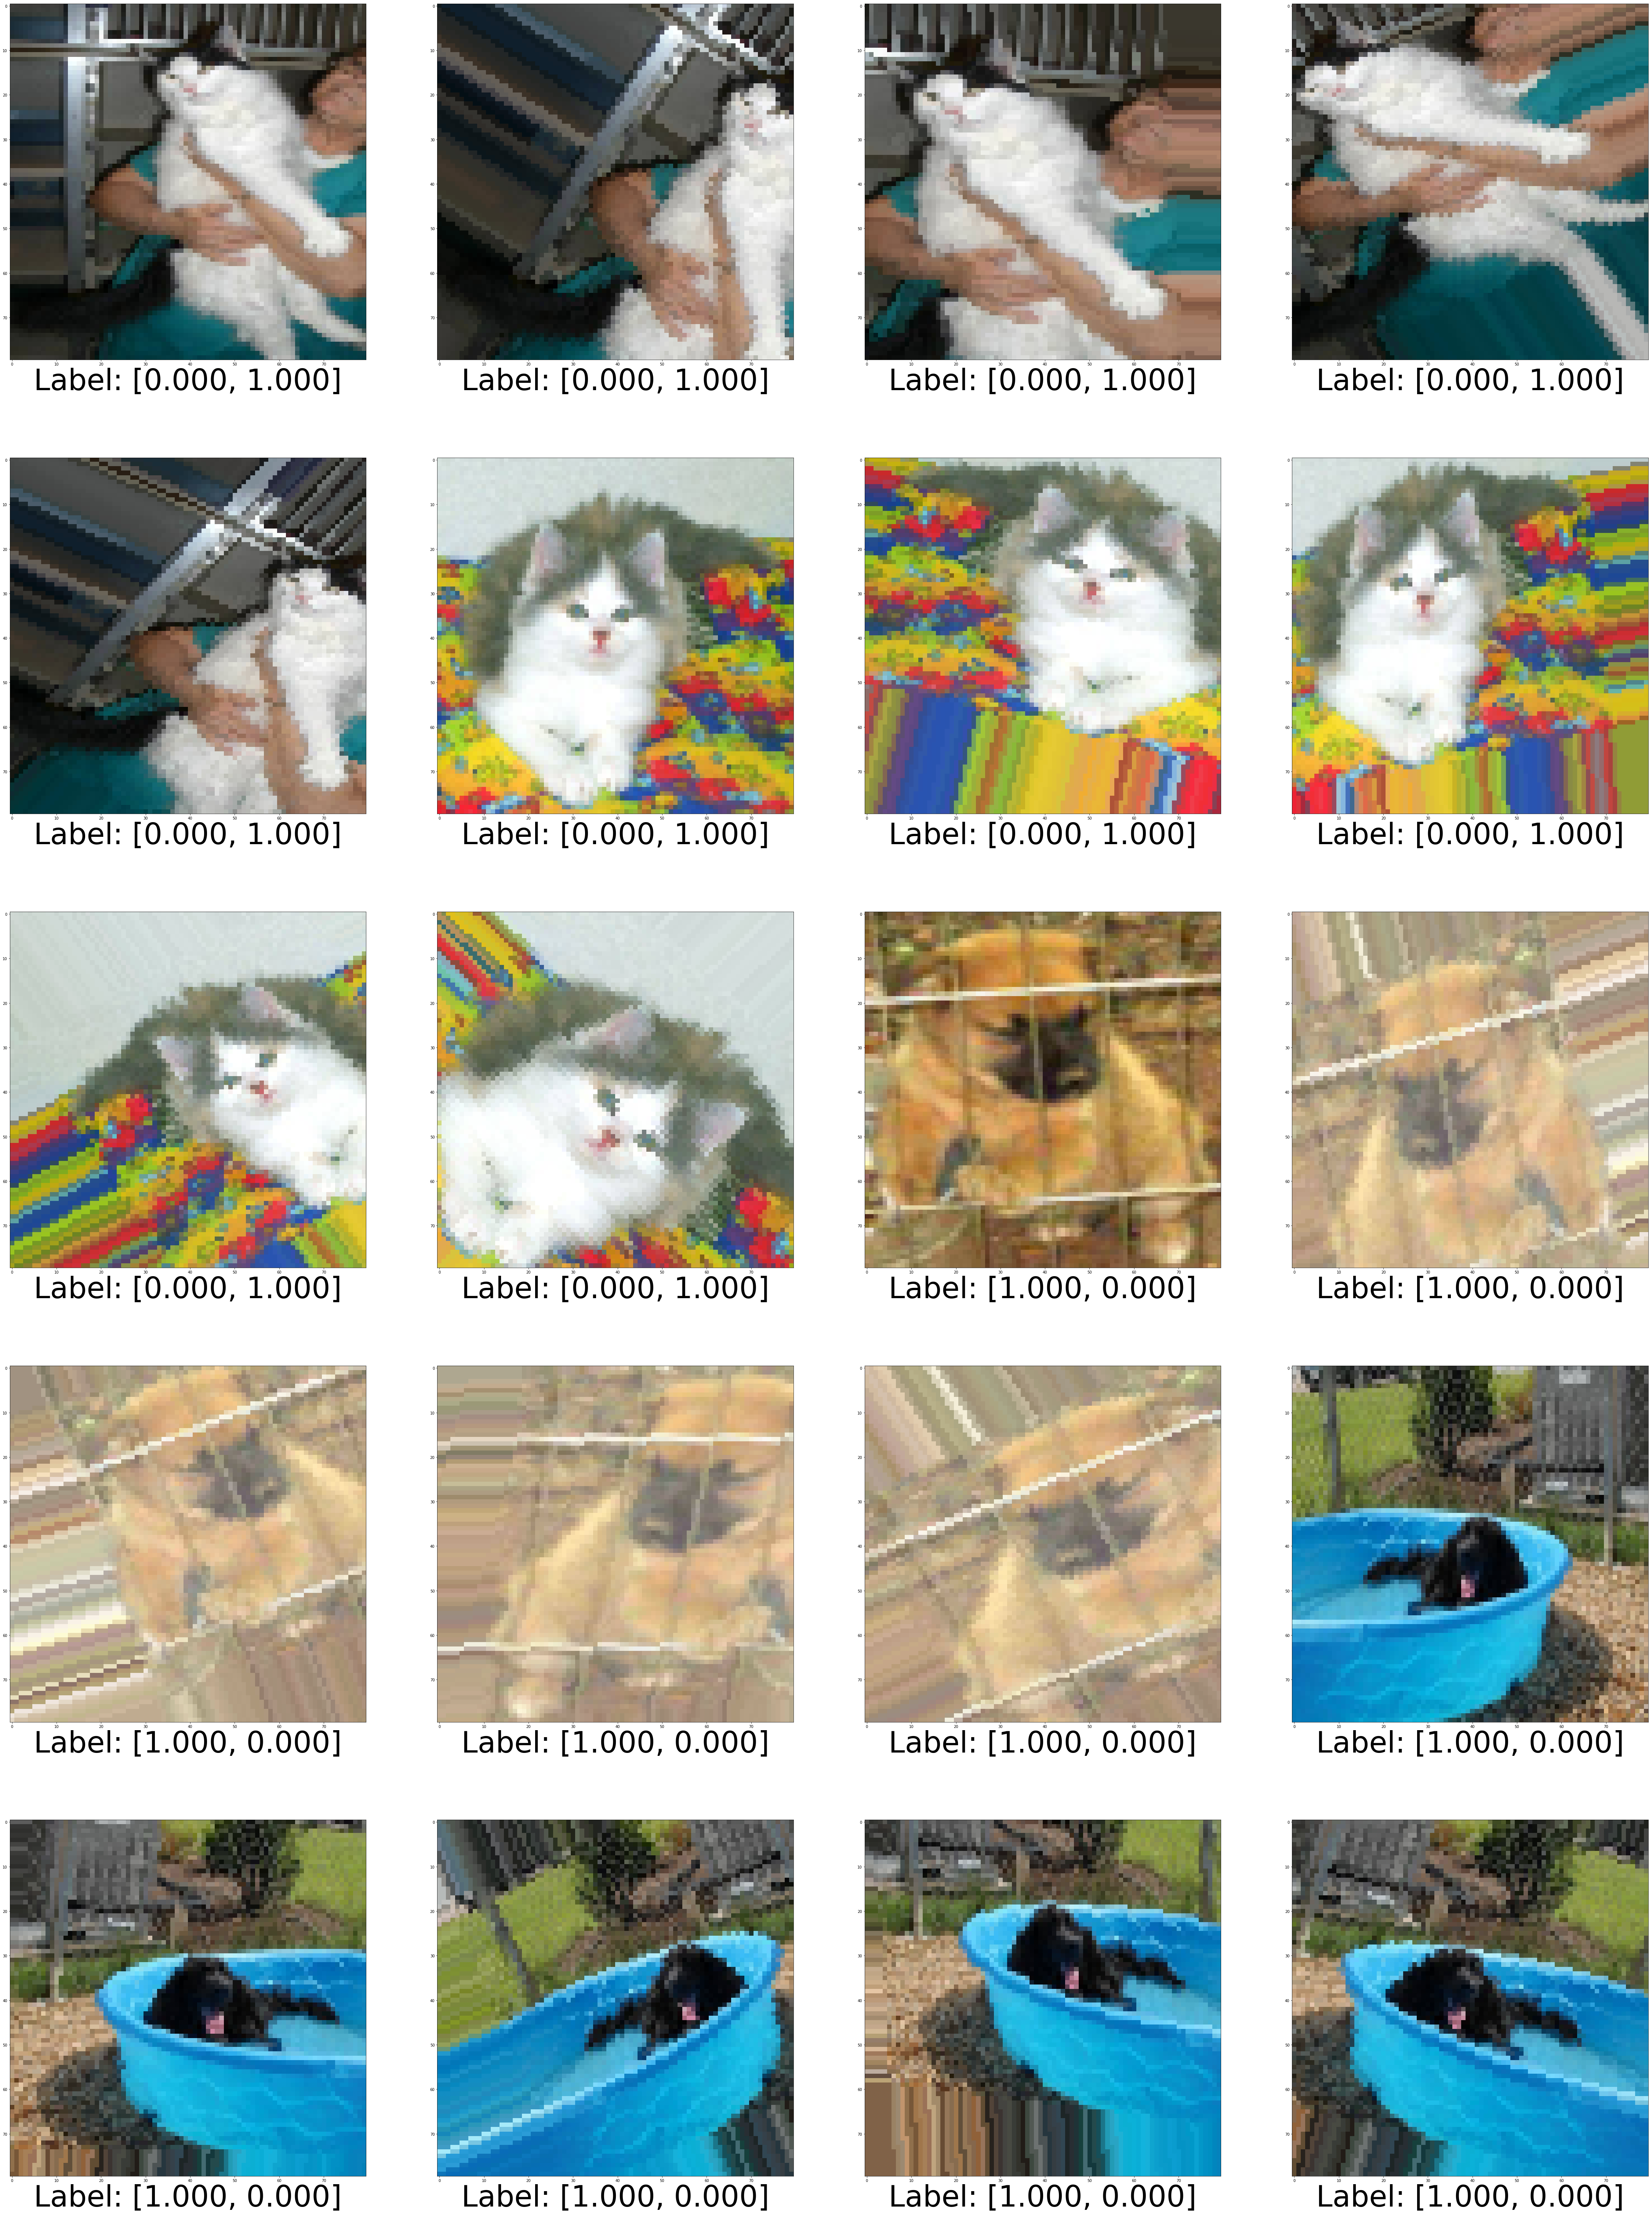

In [5]:
fig=plt.figure(figsize=(80, 110))
pred_idx = 1
# y_val.shape[0]-np.sum(correct)
print("Showing {} training examples".format(num_cols*num_rows))
for i in range(1, num_cols*num_rows +1):
    img = X[i-1]
    sub_plot = fig.add_subplot(num_rows, num_cols, i)
    sub_plot.set_xlabel('Label: [{:0.3f}, {:0.3f}]'.format(
        Y[i-1][0],
        Y[i-1][1]), fontsize=80)
    plt.imshow(img)
    plt
plt.show()